In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline

pd.options.display.float_format = "{:.2f}".format

In [2]:
df = pd.read_csv('datasets/healthcare_dataset.csv')

In [3]:
df.columns = df.columns.str.strip()
print(df.head(40))

    gender   age  hypertension  heart_disease smoking_history   bmi  \
0   Female 80.00             0              1           never 25.19   
1   Female 54.00             0              0         No Info 27.32   
2     Male 28.00             0              0           never 27.32   
3   Female 36.00             0              0         current 23.45   
4     Male 76.00             1              1         current 20.14   
5   Female 20.00             0              0           never 27.32   
6   Female 44.00             0              0           never 19.31   
7   Female 79.00             0              0         No Info 23.86   
8     Male 42.00             0              0           never 33.64   
9   Female 32.00             0              0           never 27.32   
10  Female 53.00             0              0           never 27.32   
11  Female 54.00             0              0          former 54.70   
12  Female 78.00             0              0          former 36.05   
13  Fe

In [4]:
print(df.shape)

(100000, 9)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB
None


In [6]:
print(df.describe())

            age  hypertension  heart_disease       bmi  HbA1c_level  \
count 100000.00     100000.00      100000.00 100000.00    100000.00   
mean      41.89          0.07           0.04     27.32         5.53   
std       22.52          0.26           0.19      6.64         1.07   
min        0.08          0.00           0.00     10.01         3.50   
25%       24.00          0.00           0.00     23.63         4.80   
50%       43.00          0.00           0.00     27.32         5.80   
75%       60.00          0.00           0.00     29.58         6.20   
max       80.00          1.00           1.00     95.69         9.00   

       blood_glucose_level  diabetes  
count            100000.00 100000.00  
mean                138.06      0.09  
std                  40.71      0.28  
min                  80.00      0.00  
25%                 100.00      0.00  
50%                 140.00      0.00  
75%                 159.00      0.00  
max                 300.00      1.00  


In [7]:
print(df.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [9]:
df['diabetes'].value_counts()

diabetes
0    91500
1     8500
Name: count, dtype: int64

In [10]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape)

number of duplicate rows:  (3854, 9)


In [11]:
df = df.drop_duplicates()

In [12]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

gender: 3 distinct values
age: 102 distinct values
hypertension: 2 distinct values
heart_disease: 2 distinct values
smoking_history: 6 distinct values
bmi: 4247 distinct values
HbA1c_level: 18 distinct values
blood_glucose_level: 18 distinct values
diabetes: 2 distinct values


In [13]:
df = df[df['gender'] != 'Other']

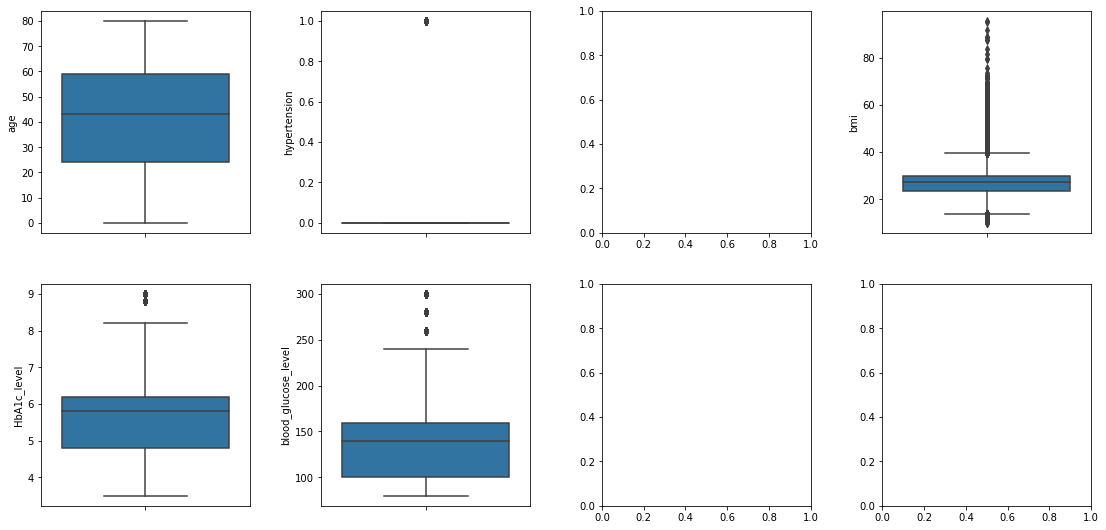

In [14]:
fig, axes = plt.subplots(2, 4, figsize=(16, 8))  
sns.boxplot(y=df['age'], ax=axes[0, 0])
sns.boxplot(y=df['hypertension'], ax=axes[0, 1])
sns.boxplot(y=df['bmi'], ax=axes[0, 3])
sns.boxplot(y=df['HbA1c_level'], ax=axes[1, 0])
sns.boxplot(y=df['blood_glucose_level'], ax=axes[1, 1])

plt.tight_layout(pad=3)
plt.show()


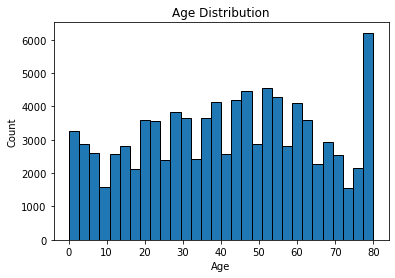

In [15]:
plt.hist(df['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

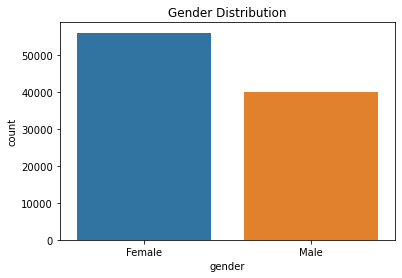

In [16]:
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.show()

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

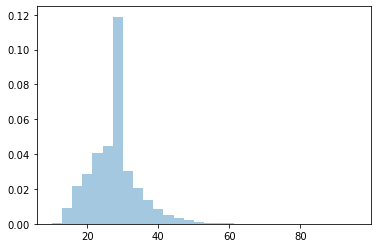

In [17]:
sns.distplot(df['bmi'], bins=30)
plt.title('BMI Distribution')
plt.show()

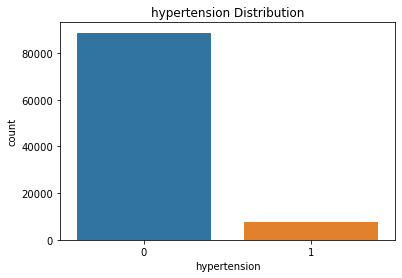

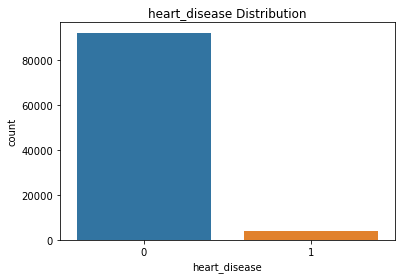

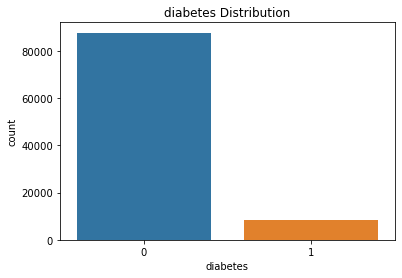

In [19]:
for col in ['hypertension', 'heart_disease', 'diabetes']:
    sns.countplot(x=col, data=df)
    plt.title(f'{col} Distribution')
    plt.show()

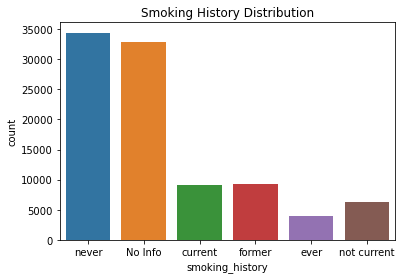

In [18]:
sns.countplot(x='smoking_history', data=df)
plt.title('Smoking History Distribution')
plt.show()

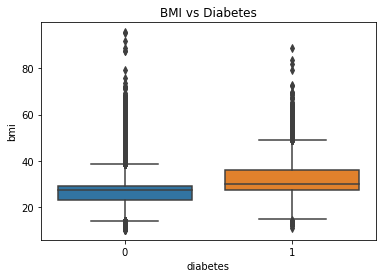

In [20]:
sns.boxplot(x='diabetes', y='bmi', data=df)
plt.title('BMI vs Diabetes')
plt.show()

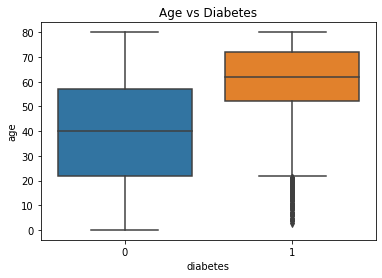

In [21]:
sns.boxplot(x='diabetes', y='age', data=df)
plt.title('Age vs Diabetes')
plt.show()

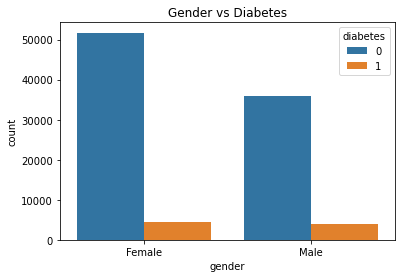

In [22]:
sns.countplot(x='gender', hue='diabetes', data=df)
plt.title('Gender vs Diabetes')
plt.show()

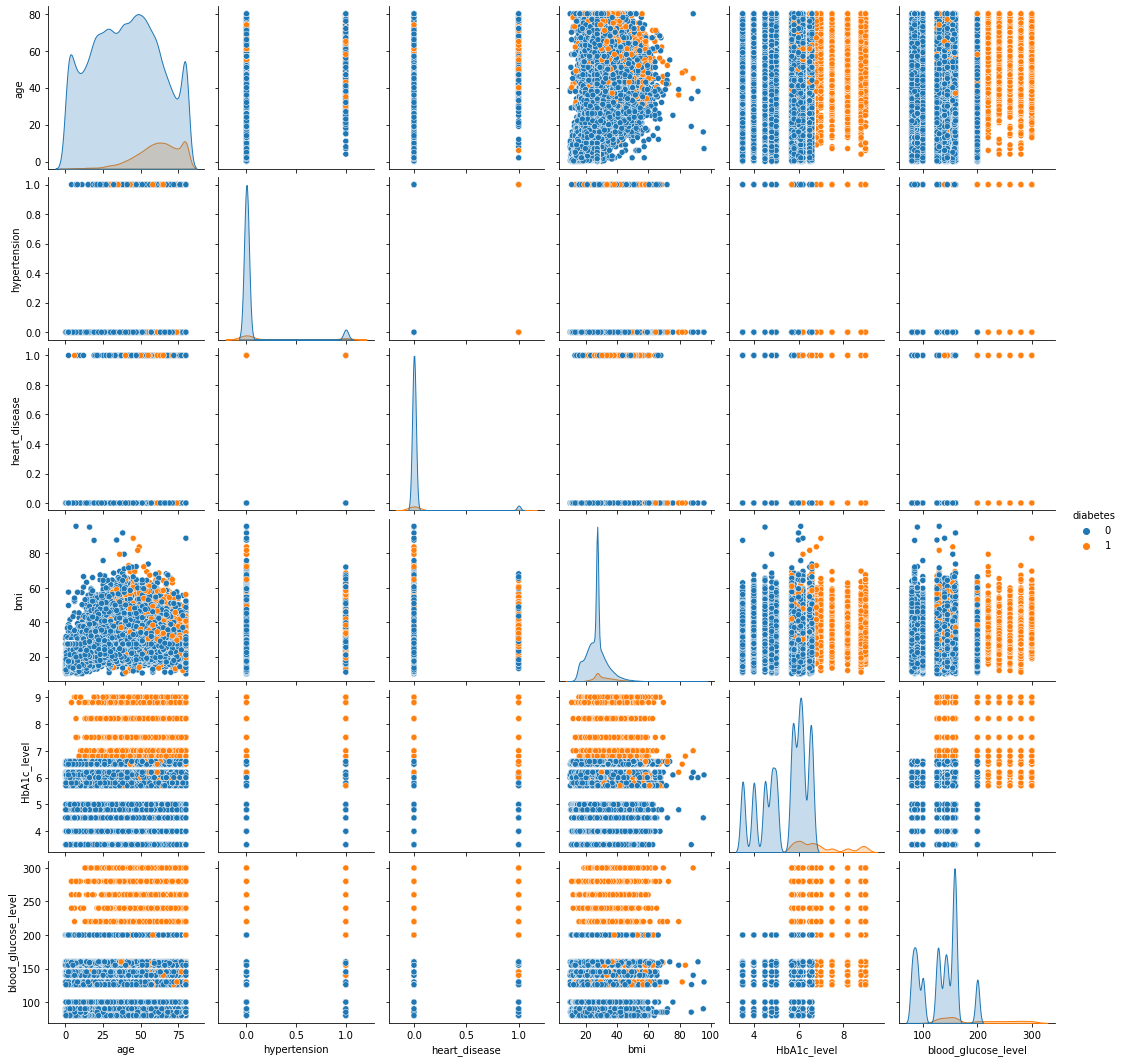

In [23]:
sns.pairplot(df, hue='diabetes')
plt.show()

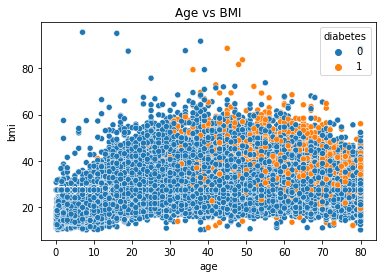

In [24]:
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df)
plt.title('Age vs BMI')
plt.show()

In [25]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 0
    elif smoking_status == 'current':
        return 1
    elif smoking_status in ['ever', 'former', 'not current']:
        return 2

df['smoking_history'] = df['smoking_history'].apply(recategorize_smoking)

In [26]:
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

In [27]:
print(df['smoking_history'].value_counts())
print(df['gender'].value_counts())

smoking_history
0    67276
2    19655
1     9197
Name: count, dtype: int64
gender
1    56161
0    39967
Name: count, dtype: int64


In [28]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

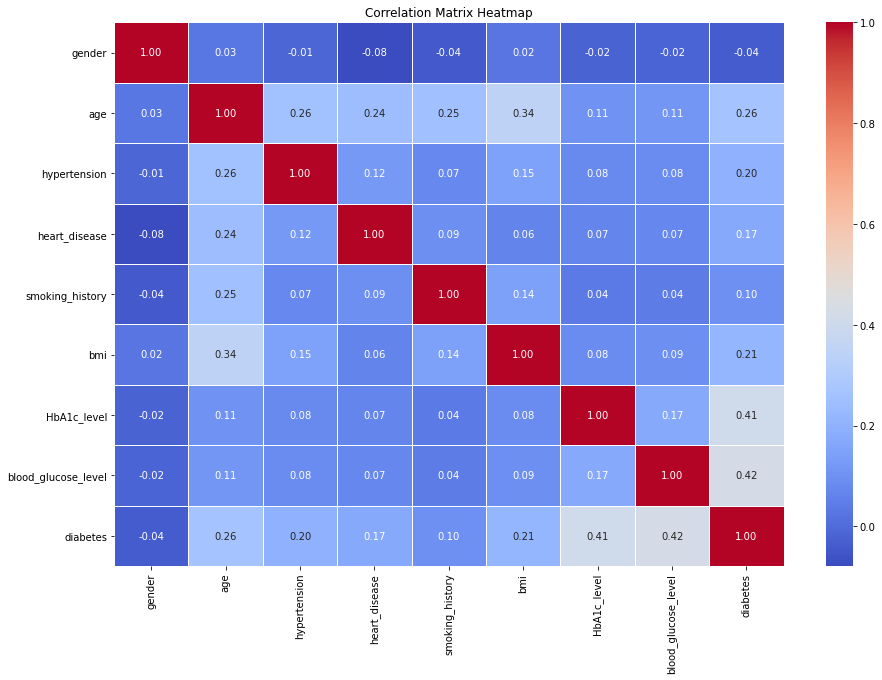

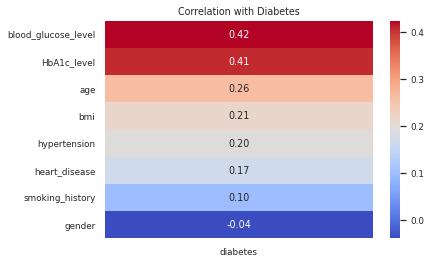

In [29]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = df.corr()
target_corr = corr['diabetes'].drop('diabetes')
target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

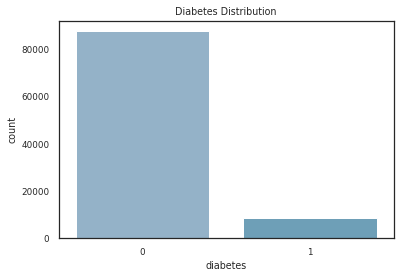

In [30]:
sns.countplot(x='diabetes', data=df)
plt.title('Diabetes Distribution')
plt.show()

In [31]:
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)

In [32]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['gender','age','hypertension','heart_disease','smoking_history','bmi', 'HbA1c_level', 'blood_glucose_level'])
    ])

X = df.drop('diabetes', axis=1)
y = df['diabetes']


In [33]:
clf = imbPipeline(steps=[('preprocessor', preprocessor),
                      ('over', over),
                      ('under', under),
                      ('classifier', RandomForestClassifier())])

In [34]:
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4]
}

In [35]:
grid_search = GridSearchCV(clf, param_grid, cv=5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

grid_search.fit(X_train, y_train)

print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'classifier__max_depth': 10, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 2, 'classifier__n_estimators': 50}


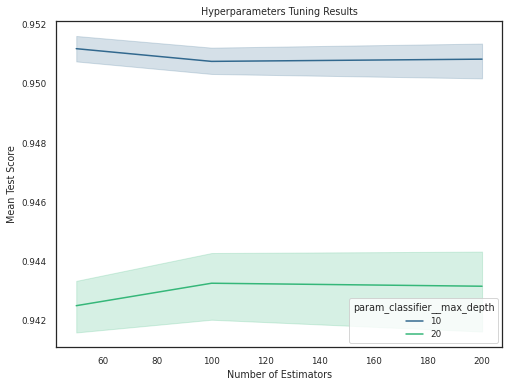

In [36]:
results_df = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8, 6))
sns.lineplot(data=results_df, x='param_classifier__n_estimators', y='mean_test_score', hue='param_classifier__max_depth', palette='viridis')
plt.title('Hyperparameters Tuning Results')
plt.xlabel('Number of Estimators')
plt.ylabel('Mean Test Score')
plt.show()

Model Accuracy:  0.9473629460106107
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17525
           1       0.67      0.80      0.73      1701

    accuracy                           0.95     19226
   macro avg       0.82      0.88      0.85     19226
weighted avg       0.95      0.95      0.95     19226



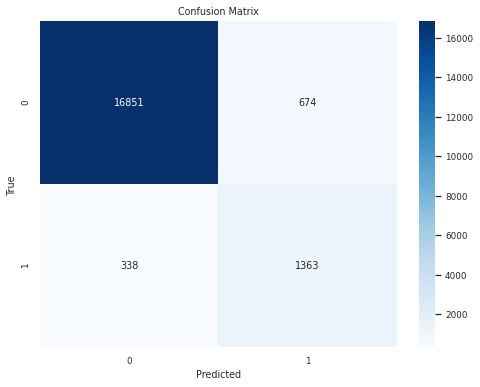

In [37]:
y_pred = grid_search.predict(X_test)

print("Model Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [38]:
import joblib

best_model = grid_search.best_estimator_
joblib.dump(best_model, 'diabetes_best_model.pkl')
print("Best model saved!")

loaded_model = joblib.load('diabetes_best_model.pkl')

print("Loaded Model Parameters: ", loaded_model.get_params())


Best model saved!
Loaded Model Parameters:  {'memory': None, 'steps': [('preprocessor', ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['gender', 'age', 'hypertension',
                                  'heart_disease', 'smoking_history', 'bmi',
                                  'HbA1c_level', 'blood_glucose_level'])])), ('over', SMOTE(sampling_strategy=0.1)), ('under', RandomUnderSampler(sampling_strategy=0.5)), ('classifier', RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=50))], 'verbose': False, 'preprocessor': ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['gender', 'age', 'hypertension',
                                  'heart_disease', 'smoking_history', 'bmi',
                                  'HbA1c_level', 'blood_glucose_level'])]), 'over': SMOTE(sampling_strategy=0.1), 'under': RandomUnderSampler(sampling_strategy=0.5), 'classifier': RandomForestClassifier(max_dept

In [39]:
X_train.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
39756,1,8.00,0,0,0,15.90,3.50,90
75304,0,65.00,1,1,0,28.49,8.80,145
19765,0,64.00,1,0,0,33.69,4.80,80
97291,0,49.00,0,0,0,21.84,5.00,130
37660,1,26.00,0,0,0,21.95,5.70,158


In [40]:
import lime
import lime.lime_tabular
import pandas as pd

explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns.tolist(),
    class_names=['Non-Diabetic', 'Diabetic'],
    mode='classification',
    verbose=True,
    random_state=42
)

sample_index = np.random.randint(0, len(X_test))
sample_instance = X_test.iloc[sample_index].values

def model_predict(data_as_array):
    data_as_df = pd.DataFrame(data_as_array, columns=X_train.columns)
    return grid_search.best_estimator_.predict_proba(data_as_df)

exp = explainer.explain_instance(
    data_row=sample_instance,  
    predict_fn=model_predict,  
    num_features=10
)

# Display the explanation
exp.show_in_notebook(show_all=False)


Intercept 0.16967592751770108
Prediction_local [0.9732112]
Right: 0.9762801511188609


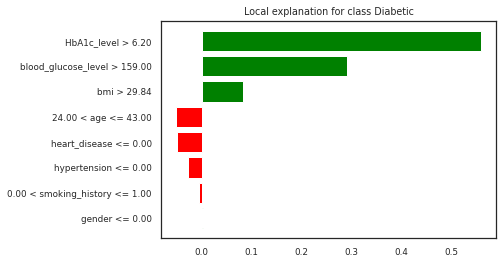

In [41]:
fig = exp.as_pyplot_figure()
plt.title(f'Local explanation for class {exp.class_names[1]}')
plt.show()

In [42]:
import shap

shap.initjs()

# Prepare your data
X = df.drop(columns=["diabetes"])  
y = df['diabetes']

model = grid_search.best_estimator_.named_steps['classifier']

explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X)

In [43]:
print(type(shap_values))
print(len(shap_values))
if isinstance(shap_values, list):
    print([np.array(v).shape for v in shap_values])
else:
    print(np.array(shap_values).shape)


<class 'numpy.ndarray'>
96128
(96128, 8, 2)


In [44]:
import shap

sample_index = np.random.randint(0, X.shape[0])

shap_values_for_class = shap_values[:, :, 1]

expected_value_for_class = explainer.expected_value[1]

shap.force_plot(expected_value_for_class, shap_values_for_class[sample_index, :], X.iloc[sample_index, :])


In [45]:
sample_indices = np.random.choice(X.shape[0], 1000, replace=False)
shap.force_plot(explainer.expected_value[1], shap_values[sample_indices, :, 1], X.iloc[sample_indices, :], link='logit')


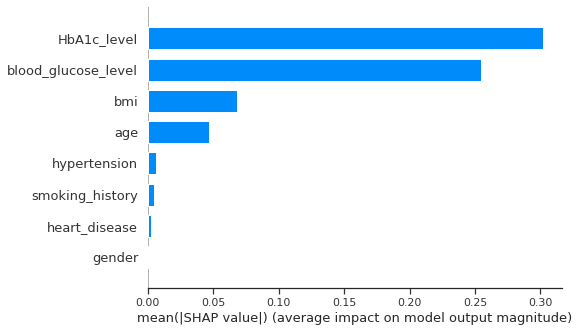

In [46]:
shap.summary_plot(shap_values[:, :, 1], X, plot_type="bar")


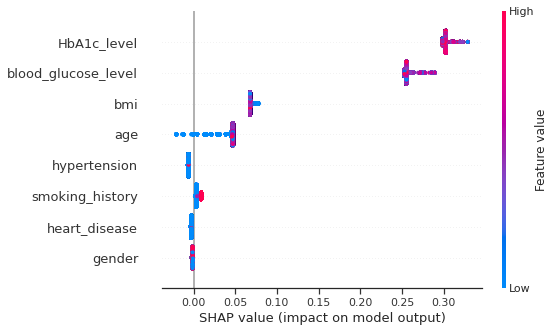

In [47]:
shap.summary_plot(shap_values[:, :, 1], X)

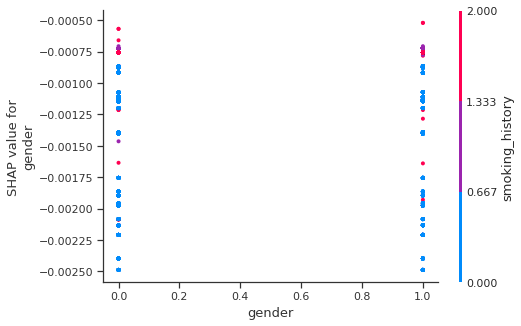

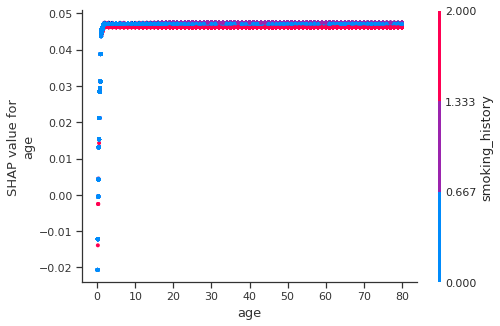

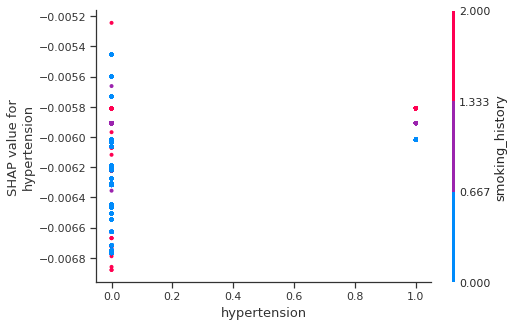

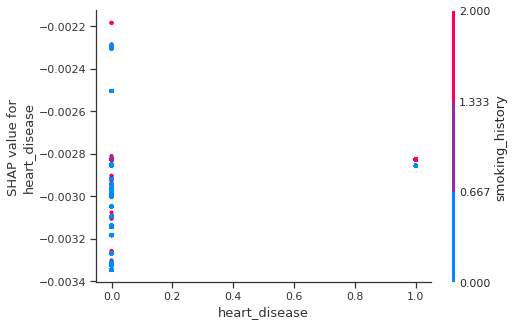

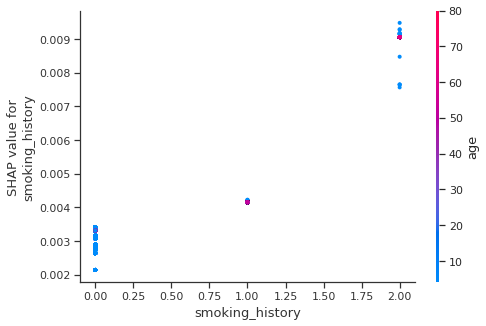

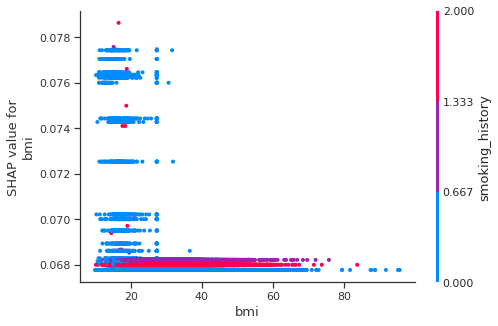

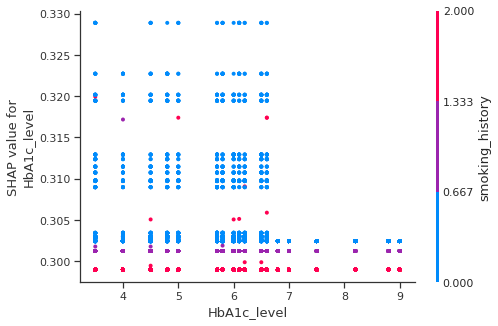

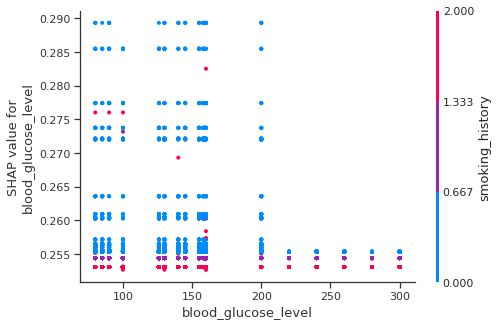

In [48]:
for name in X.columns:
    shap.dependence_plot(name, shap_values[:, :, 1], X, display_features=X)